In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SEED = 1234
NUM_SAMPLES = 50

In [3]:
# Set seed for reproducibility
np.random.seed(SEED)

In [4]:
# Generate synthetic data
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10, 20, size=num_samples)
    y = 3.5*X + random_noise # add some noise
    return X, y

In [5]:
# Generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [6]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


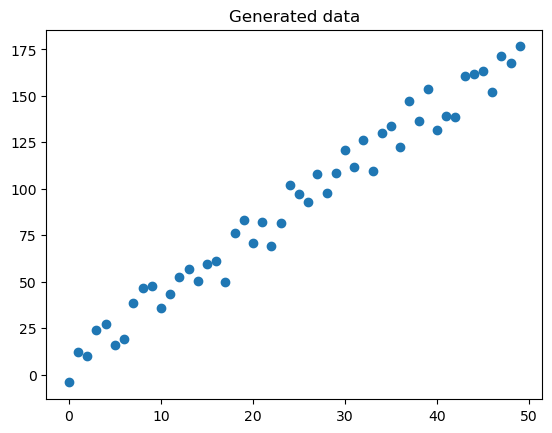

In [7]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

# Using only NumPy

In [8]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
# Shuffle data
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [10]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [11]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_test: (7, 1)
X_test: (8, 1), y_test: (8, 1)


## Standardize data
Perform zero mean and unit variance so a specific feature's magnitude doesn't affect how the model learns its weights

In [12]:
def standardize_data(data, mean, std):
    return (data - mean)/std

In [13]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [14]:
# Standardize
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [15]:
# Check (means should be ~0 and std should be ~1)
# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


## Weights

In [16]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [25]:
# Initialize random weights
def initialize_weights():
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, 1))
    return (W, b)
W, b = initialize_weights()
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


## Model

In [31]:
# Forward pass [NX1] · [1X1] = [NX1]
def forward(train, weight, bias):
    return np.dot(train, weight) + bias

y_pred = forward(X_train, W, b) 
print (f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


## Loss function

In [27]:
# Loss
N = len(y_train)
def calculate_loss(Y_train, Y_pred, N):
    return (1/N) * np.sum((Y_train - Y_pred) **2)

loss = calculate_loss(y_train, y_pred, N)

print (f"loss: {loss:.2f}")

loss: 0.99


## Gradients

In [28]:
def backgropagation(Y_train, Y_pred, X_train, N):
    dW = -(2/N) * np.sum((Y_train - Y_pred) * X_train)
    db = -(2/N) * np.sum((Y_train - Y_pred) * 1)
    return (dW, db)

dW, db = backgropagation(y_train, y_pred, X_train, N)

## Update weights

In [22]:
LEARNING_RATE = 1e-1

In [30]:
# Update weights
def update_weights(W, b, dW, db, lr=1e-1):
    nW = W - lr * dW
    nb = b - lr * db
    return (nW, nb)

W, b = update_weights(W, b, dW, db, LEARNING_RATE)
W, b

(array([[0.39747601]]), array([[1.16732021e-16]]))

## Training time

In [35]:
NUM_EPOCHS = 30

In [36]:
W, b = initialize_weights()

for epoch_num in range(NUM_EPOCHS):
    y_pred = forward(X_train, W, b)

    loss = calculate_loss(y_train, y_pred, len(y_train))
    
    # Show progress
    if epoch_num%10 == 0:
        print (f"Epoch: {epoch_num}, loss: {loss:.3f}")
    
    dW, db = backgropagation(y_train, y_pred, X_train, len(y_train))

    W, b = update_weights(W, b, dW, db, LEARNING_RATE)

Epoch: 0, loss: 0.996
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028


## Evaluation

In [37]:
# Predictions
pred_train = forward(X_train, W, b)
pred_test = forward(X_test, W, b)

In [38]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2) # calculate_loss(y_train, pred_train, len(y_train))
test_mse = np.mean((y_test - pred_test) ** 2)
print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


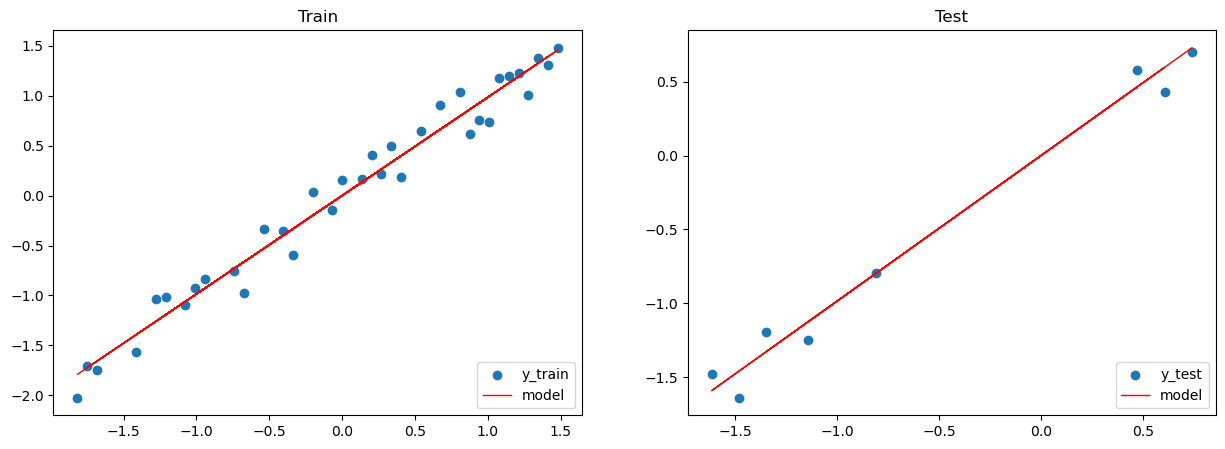

In [39]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()

## Interpretability
Unstandardize weights so we can compare it to our true weight

In [42]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 3.5X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0][0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.9
